<a href="https://colab.research.google.com/github/pp2098/Health_Insurance_Premium_Prediction/blob/main/HealthInsurancePremiumPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [79]:
df=pd.read_csv("Health_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [80]:
df.shape

(1338, 7)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [82]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


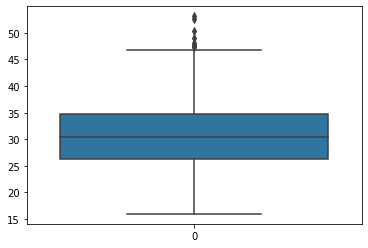

In [83]:
sns.boxplot(data=df['bmi'])

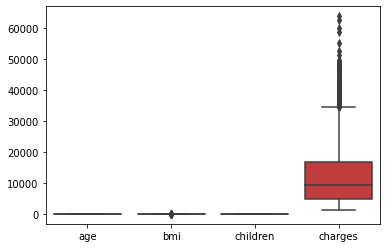

In [84]:
sns.boxplot(data=df)

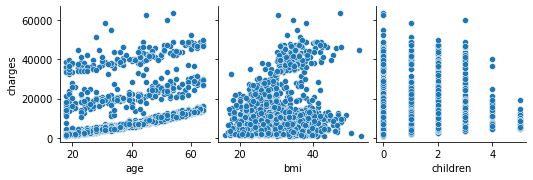

In [85]:
sns.pairplot(data=df,x_vars=['age','bmi','children'],y_vars=['charges'],kind='scatter')

In [86]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [87]:
df['sex']=df['sex'].apply(lambda x:1 if x=='female' else 0)
df['smoker']=df['smoker'].apply(lambda x:1 if x=='yes' else 0)

In [88]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [89]:
df1=df.drop(['region'],axis=1)
df1.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


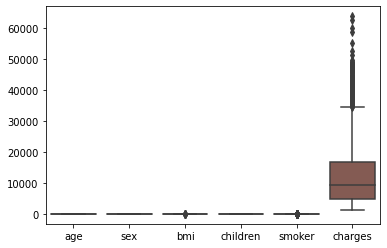

In [90]:
sns.boxplot(data=df1)

In [91]:
#bmi,smoker and chargers having outliers
Q1=df1['bmi'].quantile(0.25)
Q3=df1['bmi'].quantile(0.75)
IQR=Q3-Q1
ul=Q3+1.5*IQR
ll=Q1-1.5*IQR
df2=df1[~((df1['bmi']>ul)|(df1['bmi']<ll))]


In [92]:
Q1=df2['charges'].quantile(0.25)
Q3=df2['charges'].quantile(0.75)
IQR=Q3-Q1
df3=df2[~((df1['charges']>(Q3+1.5*IQR))|(df2['charges']<(Q1-1.5*IQR)))]
df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


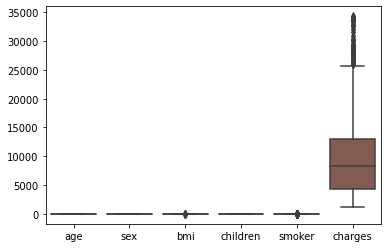

In [93]:
sns.boxplot(data=df3)
#All outliers are removed

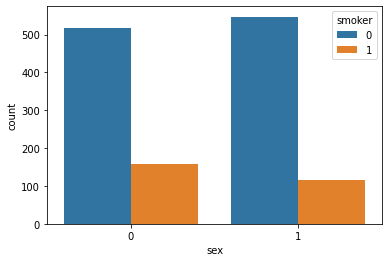

In [94]:
sns.countplot(x=df1['sex'],hue=df1['smoker'],data=df1)

In [95]:
df1.corr()['charges'].sort_values

<bound method Series.sort_values of age         0.299008
sex        -0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64>

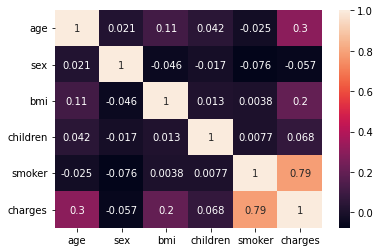

In [96]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

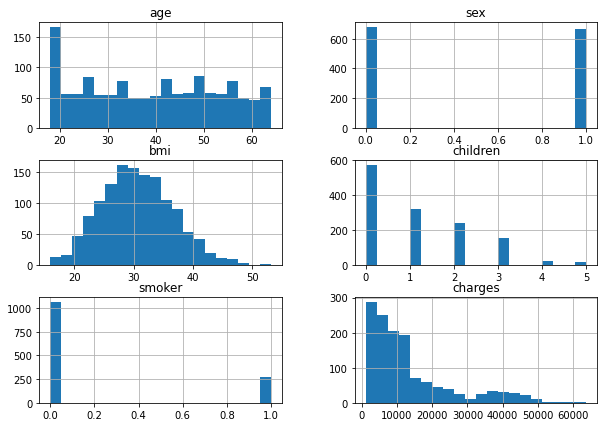

In [97]:
df.hist(bins=20,figsize=(10,7))
plt.show()

In [98]:
df3.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [99]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1191 non-null   int64  
 1   sex       1191 non-null   int64  
 2   bmi       1191 non-null   float64
 3   children  1191 non-null   int64  
 4   smoker    1191 non-null   int64  
 5   charges   1191 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 65.1 KB


In [100]:
df3.shape

(1191, 6)

In [101]:
x=df3.drop(['charges'],axis=1)
y=df3['charges']


In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=10)
print("X shape",X_train.shape,X_test.shape)
print("Y shape",Y_train.shape,Y_test.shape)

X shape (833, 5) (358, 5)
Y shape (833,) (358,)


In [106]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)
from sklearn import metrics
print("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test,rf_pred)))
print("Mean Absolute error:",metrics.mean_absolute_error(Y_test,rf_pred))
print("Mean Squared error:",metrics.mean_squared_error(Y_test,rf_pred))

RMSE:  4364.156537787893
Mean Absolute error: 2439.643026425278
Mean Squared error: 19045862.286316812


In [108]:
print("Prediction Premium amount: ")
data=pd.DataFrame(data={"Premium Amount":rf_pred})
data.head(5)


Prediction Premium amount: 


,Premium Amount
0,3458.130441
1,5303.089671
2,12597.148639
3,2308.585121
4,7062.349845
